In [16]:
from annoy import AnnoyIndex
exec(open("../database.py").read())
exec(open("../helperFunctions.py").read())
import numpy as np
from keras.datasets import mnist
from time import perf_counter
from ast import literal_eval

In [2]:
name = 'glove-100-angular'
nameFull = name +'-true-labels.xlsx'
datasetTrainImages, datasetTestImages, _ = get_ann_benchmark_data(name)

<string>:57: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


trainDataset :  (1183514, 100)
testDataset :  (10000, 100)


<string>:58: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
<string>:59: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.


***Create Annoy Index***

In [3]:
def createIndex(indexMethod, datasetImages):
    f = datasetImages.shape[1] # Length of item vector that will be indexed
    t = indexMethod(f, 'euclidean')
    time_start = perf_counter()
    for i in range(datasetImages.shape[0]):
        t.add_item(i, datasetImages[i])
    t.build(10) # 10 trees
    time_end = perf_counter()
    totalTime = (time_end - time_start)
    print(f'Took {totalTime:.3f} seconds')
    return (t, totalTime)
(indexedStruct, time) = createIndex(AnnoyIndex, datasetTrainImages)

Took 28.731 seconds


In [4]:
# (min, max) = createIndexNumerous(createIndex, AnnoyIndex, datasetImages, 10)
# print('min : ', min, '\n','max : ', max,)

In [5]:
indexName = name + '-index.ann'
indexedStruct.save(indexName)

True

***Basic operations on annoy index***

In [6]:
indexName = name + '-index.ann'
u = AnnoyIndex(datasetTrainImages.shape[1], 'euclidean')
u.load(indexName) # super fast, will just mmap the file

True

In [7]:
indexes = []
distances = []
def measureTime(par, indexes, distances, datasetTestImages):
    totalTime = 0
    for i in range(par) : 
        time_start = perf_counter()
        (index, distance) = u.get_nns_by_vector(datasetTestImages[i], 100, include_distances=True)
        time_end = perf_counter()
        totalTime += (time_end - time_start)
        indexes.append(index)
        distances.append(distance)
    # report the duration
    print(f'Took {totalTime:.3f} seconds')
    return np.round(totalTime, 3)
numberOfQueries = 1000
measureTime(numberOfQueries, indexes, distances, datasetTestImages)

Took 0.805 seconds


0.805

In [8]:
# (min, max) = measureTimeNumerous(measureTime, 10)
# print('min : ', min, '\n','max : ', max,)

In [9]:
indexes = np.array(indexes)
distances = np.round(np.array(distances).astype(float), 4)

In [10]:
print('indexes : ', indexes.shape)
print('distances : ', distances.shape)

indexes :  (1000, 100)
distances :  (1000, 100)


In [11]:
path = '../datasets/'+nameFull
(trueIndexes, trueDistances) = readDB(path)

trueIndexes :  (1000, 100)
trueDistances :  (1000, 100)


In [21]:
compareElems(90, indexes, distances, trueIndexes, trueDistances)

94664 || 660281
4.144 || 3.8792
21236 || 93438
4.1703 || 3.8838
459704 || 1133489
4.2301 || 3.9021
1134590 || 97478
4.2732 || 3.9037
654189 || 995275
4.3152 || 3.9294
1156196 || 207076
4.3477 || 3.9378
598102 || 989330
4.3527 || 3.9523
554035 || 846101
4.3904 || 3.955
515592 || 242797
4.4613 || 3.9568
811715 || 402216
4.471 || 3.9697
980490 || 671078
4.4713 || 3.9716
16480 || 926741
4.4798 || 3.978
1046667 || 256447
4.5059 || 3.9857
1130544 || 914908
4.529 || 3.9933
864853 || 229951
4.5424 || 3.9934
780049 || 956338
4.5473 || 4.0067
1093919 || 859959
4.5568 || 4.009
1049786 || 56568
4.5617 || 4.013
1014096 || 647843
4.5629 || 4.0318
883395 || 987056
4.5685 || 4.035
602072 || 900915
4.5739 || 4.0351
681840 || 963392
4.5764 || 4.0436
210076 || 100544
4.5897 || 4.0537
349560 || 861914
4.5932 || 4.0619
610830 || 1025986
4.596 || 4.064
454198 || 80231
4.604 || 4.0686
917845 || 134899
4.6089 || 4.073
798162 || 294110
4.6124 || 4.0761
633586 || 716135
4.6137 || 4.0762
790221 || 452141
4.6305 

In [13]:
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.01)
calculateRecallAverage(indexes, distances, trueIndexes, trueDistances, 1.1)

0.0150
0.0342
0.6346


In [14]:
print(indexes[0]) # will find the 100 nearest neighbors

[  94664   21236  459704 1134590  654189 1156196  598102  554035  515592
  811715  980490   16480 1046667 1130544  864853  780049 1093919 1049786
 1014096  883395  602072  681840  210076  349560  610830  454198  917845
  798162  633586  790221  767160  935437  491744  499484  756339   75921
  319514  966562  357382  723260  526533  301146  272881  519675  178369
  900477 1018509  779079 1139710  205943 1043128  425047  818225  300615
  762824     429  682228  310750 1107295  409735  754547  863340  250925
  263567  229842   27959  708091  717552  692451  638793  122520  542763
  664794   34703  583292  665866  499793  515093  641887    7785 1167227
  204043  583294  451861  657113  736975  219577  469281  196571 1103806
  964648  294809  703793  128822  525826  561937  483965 1130453  293808
  875552]


index :  94664 
distance :  4.144
index :  21236 
distance :  4.1703
index :  459704 
distance :  4.2301
index :  1134590 
distance :  4.2732
index :  654189 
distance :  4.3152
index :  1156196 
distance :  4.3477
index :  598102 
distance :  4.3527
index :  554035 
distance :  4.3904
index :  515592 
distance :  4.4613
index :  811715 
distance :  4.471


ValueError: cannot reshape array of size 100 into shape (28,28)

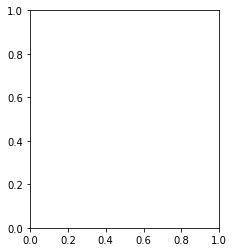

In [15]:
# draw_mnist(indexes, distances, datasetTrainImages)